# Data Mining Week 3 Class Practice
# Rayna Shera Chang / 0706022310022
# Decision Tree & Naïve Bayes Classification

In [420]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [421]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [423]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


### Handle missing values in `Health_Issues`

In [424]:
df = df.fillna('None')

In [425]:
df = df.drop('ID', axis=1, errors='ignore')
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### Frequency distribution of values in variables

In [426]:
col_names = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']

for col in col_names:
    print(df[col].value_counts())

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Germany        497
Australia      497
Belgium        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64
Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64
Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64
Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
Occupation
Office        2073
Other         2038
Student       1968
Healthcare    1964
Service       1957
Name: count, dtype: int64


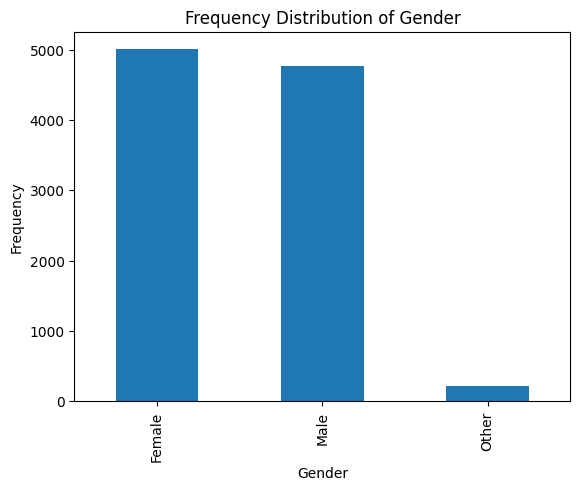

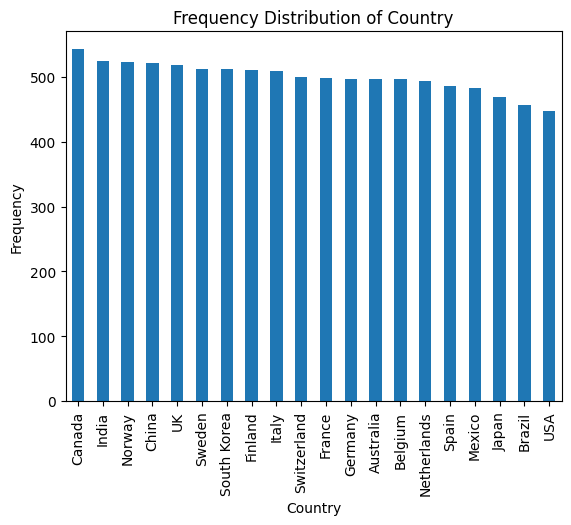

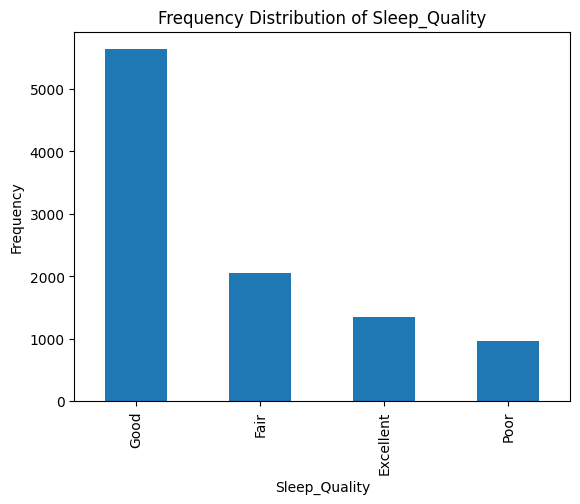

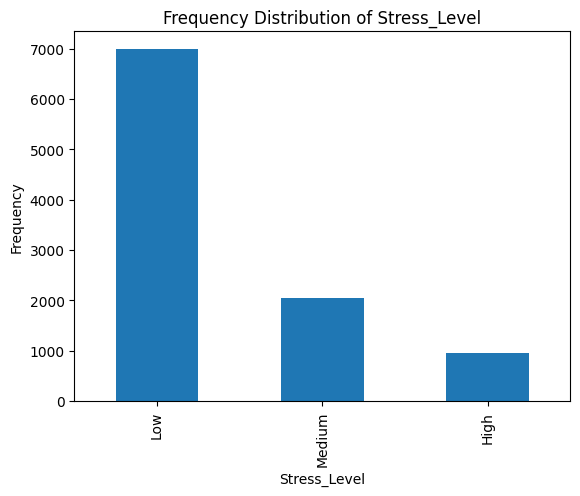

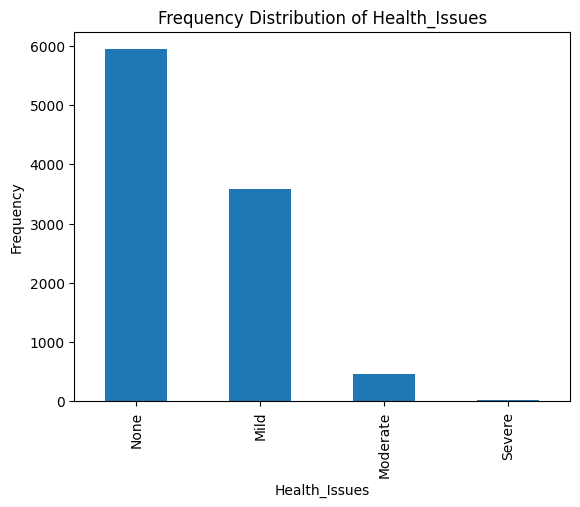

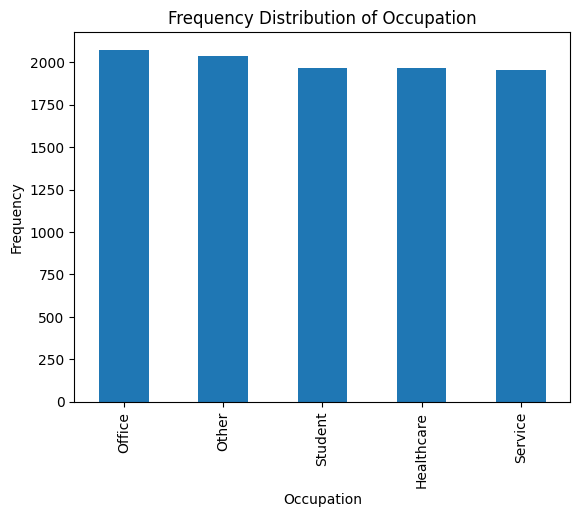

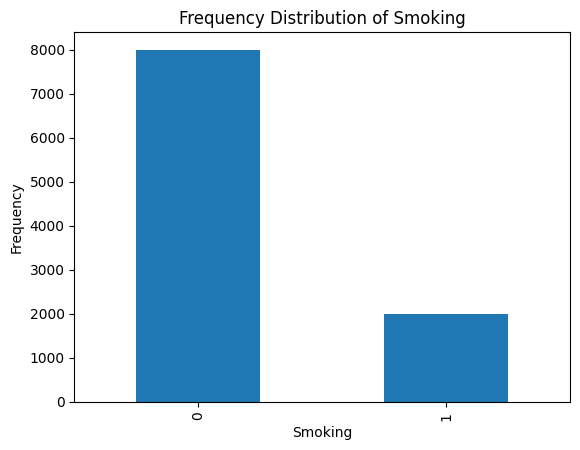

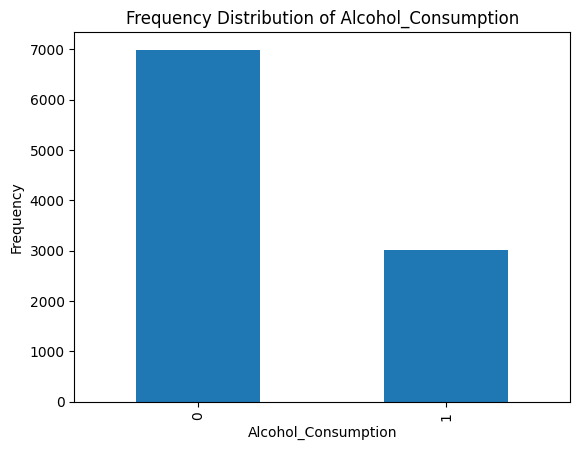

In [427]:
col_names = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

In [428]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'Age':
[40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
--------------------
Unique values for column 'Gender':
['Male' 'Female' 'Other']
--------------------
Unique values for column 'Country':
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
--------------------
Unique values for column 'Coffee_Intake':
[3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.6 7.8 6.8 7.7 6.9]
--------------------
Unique values for column 'Caffeine_mg':
[328.1  94.1 5

In [429]:
df['Health_Issues'].value_counts()

,count
Health_Issues,
None,5941
Mild,3579
Moderate,463
Severe,17


In [430]:
# check missing values in variables

df.isnull().sum()

,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0
Stress_Level,0


# **Visualization** <a class="anchor" id="10"></a>

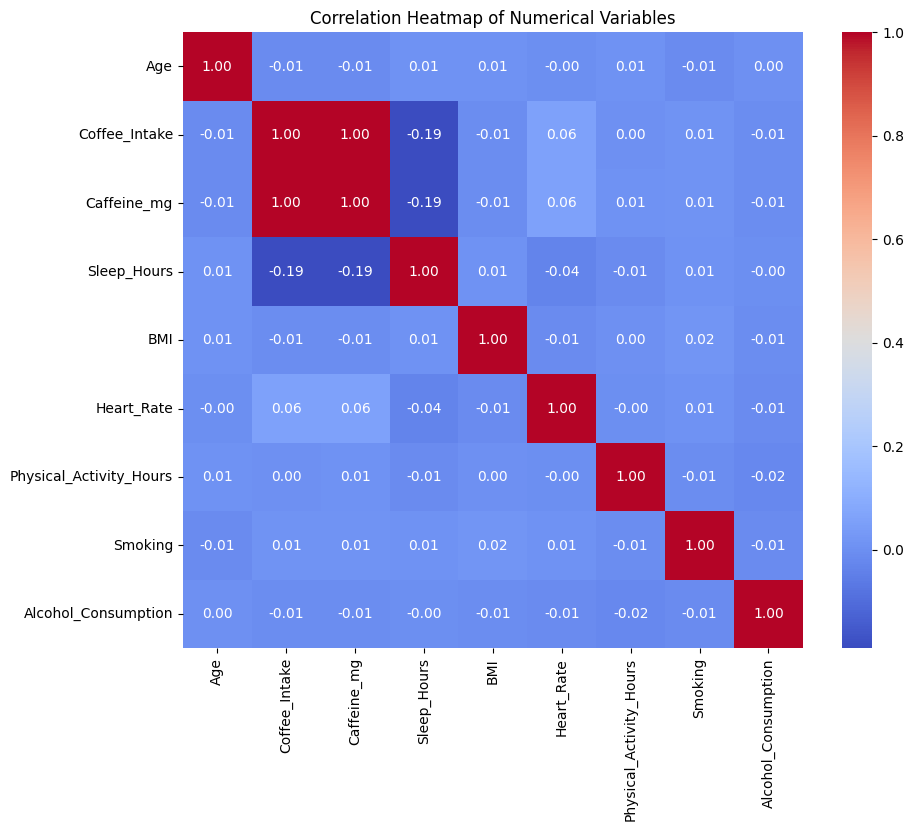

In [431]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

This correlation heatmap shows the relationships among the numerical variables in the dataset. Most correlations are very weak (close to 0), indicating that the numeric features are largely independent of one another. The only noticeable pattern is a **moderate negative correlation (-0.19) between caffeine intake and sleep hours**, suggesting that individuals who consume more caffeine tend to sleep less. Additionally, `Coffee_Intake` and `Caffeine_mg` are perfectly correlated (1.0), which is expected since caffeine content directly depends on the amount of coffee consumed. Other variables such as BMI, heart rate, physical activity, smoking, and alcohol consumption show almost no meaningful linear correlation with each other, implying that these health and lifestyle factors vary independently in this dataset.

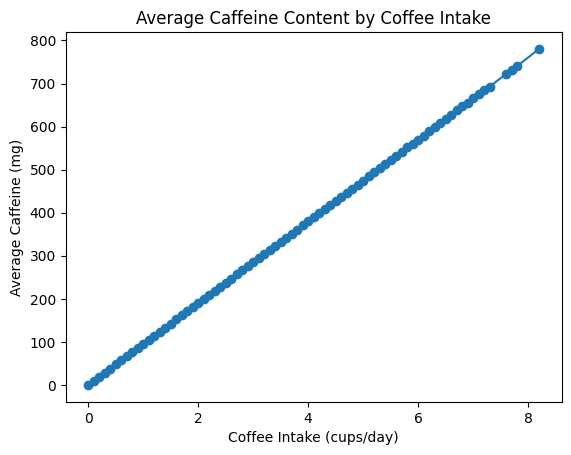

In [432]:
avg_caffeine = df.groupby('Coffee_Intake')['Caffeine_mg'].mean()
avg_caffeine.plot(kind='line', marker='o')
plt.title("Average Caffeine Content by Coffee Intake")
plt.xlabel("Coffee Intake (cups/day)")
plt.ylabel("Average Caffeine (mg)")
plt.show()

This line plot clearly demonstrates the **direct and perfectly linear relationship** between coffee intake (cups per day) and average caffeine consumption (mg). As the number of cups increases, caffeine intake rises proportionally, forming an almost perfect straight line. This makes sense because caffeine content is inherently dependent on the number of cups consumed, with each additional cup contributing a consistent amount of caffeine. The visualization confirms that `Coffee_Intake` and `Caffeine_mg` are redundant variables, meaning including both in a predictive model may add no extra information and could introduce multicollinearity.

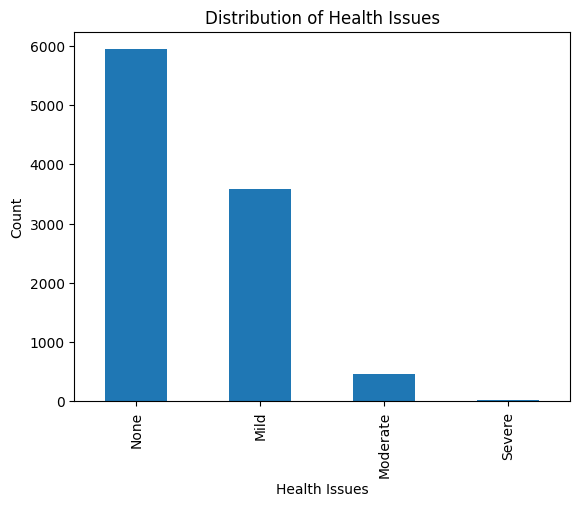

In [433]:
df['Health_Issues'].value_counts().plot(kind='bar')
plt.title("Distribution of Health Issues")
plt.xlabel("Health Issues")
plt.ylabel("Count")
plt.show()

This bar chart illustrates the distribution of health issues within the dataset. The majority of individuals report having **no health issues**, followed by a significant portion with **mild issues**, while **moderate** and especially **severe cases** are relatively rare. This imbalance indicates that the dataset is heavily skewed toward healthier individuals, which could influence model performance by biasing predictions toward the majority “None” class. Such class imbalance suggests the need for careful evaluation metrics beyond accuracy, and possibly techniques like resampling or class weighting if the goal is to improve prediction of less frequent categories like “Moderate” and “Severe.”

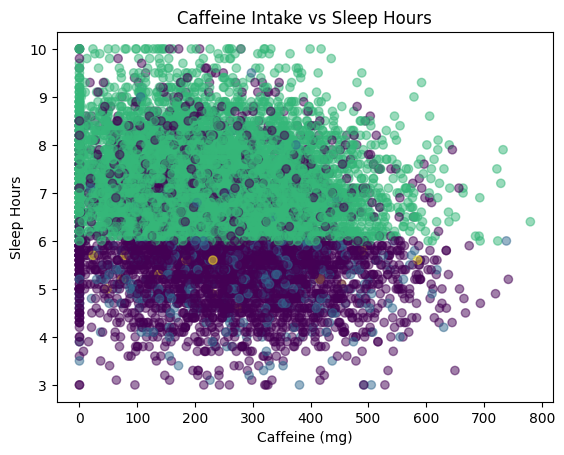

In [434]:
plt.scatter(df['Caffeine_mg'], df['Sleep_Hours'],
            c=df['Health_Issues'].astype('category').cat.codes, alpha=0.5)
plt.title("Caffeine Intake vs Sleep Hours")
plt.xlabel("Caffeine (mg)")
plt.ylabel("Sleep Hours")
plt.show()

This scatter plot shows the relationship between caffeine intake (mg) and sleep hours. Although the points are widely spread, there is a **slight negative trend**, suggesting that individuals who consume higher amounts of caffeine tend to sleep fewer hours. Many observations cluster around 5–6 hours of sleep, indicating that this is the most common sleep duration in the dataset regardless of caffeine intake. However, the dense overlap and wide variability imply that sleep is influenced by many other factors beyond caffeine, meaning caffeine alone cannot fully explain differences in sleep duration.

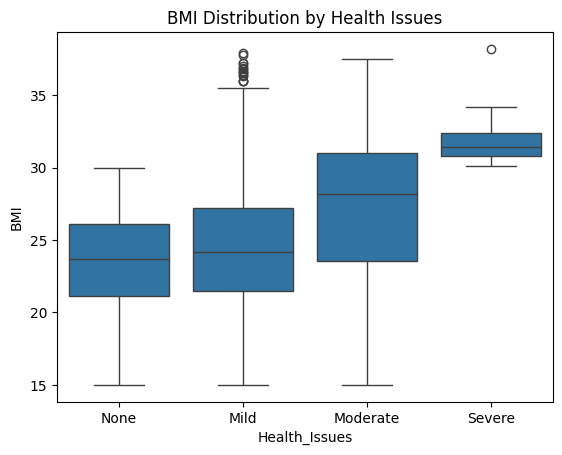

In [435]:
import seaborn as sns
sns.boxplot(x='Health_Issues', y='BMI', data=df)
plt.title("BMI Distribution by Health Issues")
plt.show()

This boxplot illustrates the distribution of BMI across different levels of health issues. Individuals with **no health issues** generally have lower BMI values with a tighter spread, while those with **mild and moderate issues** show a wider range, including more outliers at higher BMI levels. Notably, the **severe health issues group** has the highest median BMI and a relatively narrow interquartile range, indicating that severe cases are strongly associated with elevated BMI values. Overall, the trend suggests that a higher BMI is linked with increased severity of health issues, supporting the well-established connection between obesity and health risks.

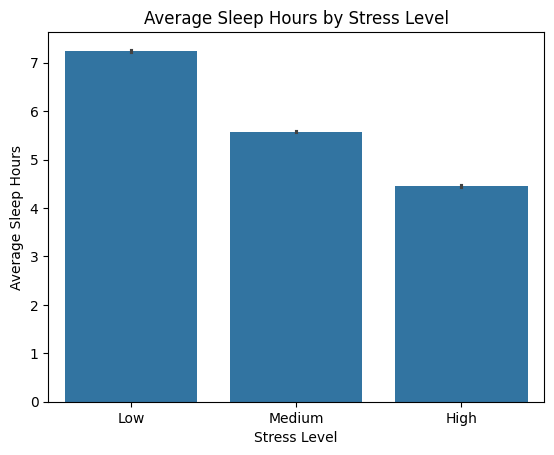

In [436]:
sns.barplot(x='Stress_Level', y='Sleep_Hours', data=df)
plt.title("Average Sleep Hours by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Average Sleep Hours")
plt.show()

This bar chart illustrates the relationship between stress levels and average sleep duration. Individuals with **low stress (1)** average the longest sleep at around 7 hours per night, while those with **medium stress (2)** drop to about 5.5 hours, and those with **high stress (3)** average fewer than 5 hours of sleep. The clear downward trend suggests that higher stress levels are associated with reduced sleep duration, supporting the well-established link between stress and poor sleep quality. This finding highlights the importance of stress management for maintaining healthy sleep patterns.

# **Encode categorical variables** <a class="anchor" id="10"></a>

In [437]:
for column in ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation']:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
['None' 'Mild' 'Moderate' 'Severe']
['Other' 'Service' 'Office' 'Student' 'Healthcare']


In [438]:
# Encoding for ordinal column
gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
occupation_map = {'Student': 1, 'Service': 2, 'Office': 3, 'Healthcare': 4, 'Other': 5}
country_map = {'Germany': 1, 'Brazil': 2, 'Spain': 3, 'Mexico': 4, 'France': 5, 'Canada': 6, 'UK': 7, 'Switzerland': 8, 'Netherlands': 9, 'Italy': 10, 'China': 11, 'Japan': 12, 'Belgium': 13, 'Finland': 14, 'Australia': 15, 'Sweden': 16, 'India': 17, 'Norway': 18, 'South Korea': 19, 'USA': 20}
health_map = {'Severe': 1, 'Moderate': 2, 'Mild': 3, 'None': 4}
binary_map = {'Yes': 1, 'No': 0}

df['Gender'] = df['Gender'].map(gender_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Country'] = df['Country'].map(country_map)

# Target column
df['Health_Issues'] = df['Health_Issues'].map(health_map)

df.sample(5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
4584,32,1,9,1.8,166.7,6.0,2,23.6,71,2,5.0,3,2,1,0
8050,22,2,2,0.9,80.8,6.8,3,21.2,61,1,13.2,4,1,0,1
6173,19,2,18,3.3,310.8,6.1,3,25.6,73,1,2.1,4,2,0,1
7627,40,1,9,2.0,186.7,8.7,4,20.3,77,1,0.6,4,2,0,0
9406,20,2,9,1.3,128.2,5.3,2,24.6,75,2,6.5,3,3,0,1


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [439]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [440]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,3,24.9,78,1,14.5,5,0,0
1,33,1,1,1.0,94.1,6.2,3,20.0,67,1,11.0,2,0,0
2,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,3,0,0
3,53,1,1,2.6,249.2,7.3,3,24.7,71,1,6.6,5,0,0
4,32,2,3,3.1,298.0,5.3,2,24.1,76,2,8.5,1,0,1


In [441]:
y.head()

,Health_Issues
0,4
1,4
2,3
3,3
4,3


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [442]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [443]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [444]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,1,3,4.3,405.6,5.4,2,18.0,86,2,2.4,2,0,1
1561,26,1,17,0.0,0.0,5.5,2,28.3,75,2,10.8,5,0,0
1670,32,1,19,2.8,268.1,7.3,3,27.4,69,1,8.6,3,0,0
6087,18,1,19,2.2,208.6,8.1,4,16.3,83,1,8.9,5,0,1
6669,43,2,7,2.6,251.1,9.4,4,25.4,68,1,3.4,3,0,0


In [445]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,1,18,2.6,245.9,6.7,3,30.1,76,1,1.9,2,0,1
4684,22,2,4,3.1,293.1,7.6,3,20.4,69,1,5.0,2,0,0
1731,30,1,15,3.9,372.4,6.4,3,27.5,75,1,13.8,3,0,0
4742,35,1,1,1.0,92.5,5.3,2,23.1,71,2,2.4,2,0,0
4521,47,1,10,1.3,119.0,6.9,3,28.4,64,1,9.6,3,1,0


# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [446]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [447]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [448]:
# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [449]:
# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 8, 6, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 132, 0, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [12, 209, 0, 0]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [0, 31, 800, 4723]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

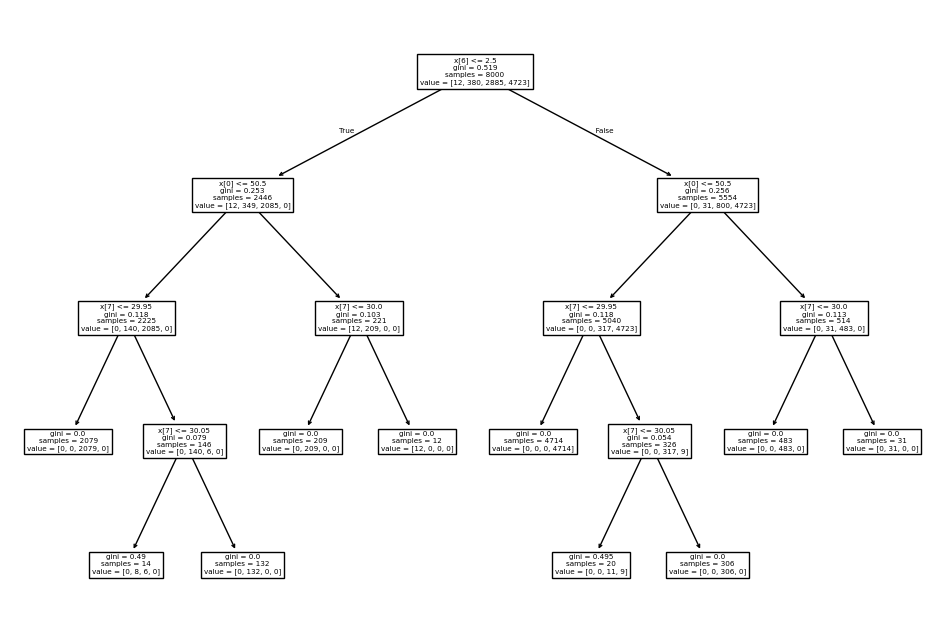

In [450]:
# Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [451]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [452]:
# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

In [453]:
# Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [12, 209, 0, 0]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [0, 31, 800, 4723]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [0, 0, 317, 4723]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

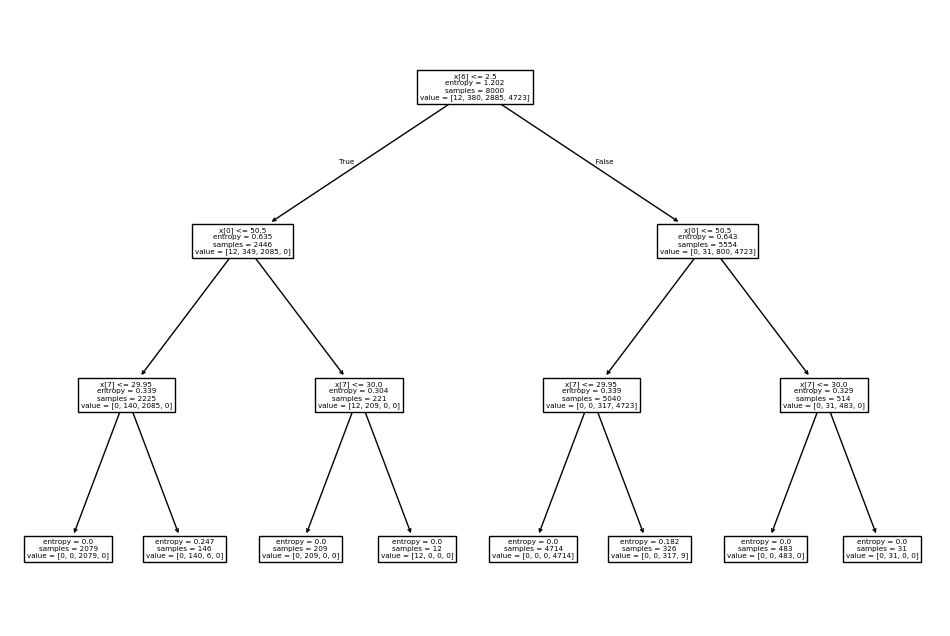

In [454]:
# Visualize decision-trees
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [455]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [456]:
y_pred_nb = nb_classifier.predict(X_test)

In [457]:
# Check accuracy score with naive bayes
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8575


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [458]:
from sklearn.metrics import classification_report

# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))
acc_gini = accuracy_score(y_test, y_pred_gini)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.99      0.99      0.99        83
           3       0.99      1.00      0.99       694
           4       1.00      1.00      1.00      1218

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [459]:
# DECISION TREE ENTROPY

print(classification_report(y_test, y_pred_en))
acc_en = accuracy_score(y_test, y_pred_en)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.99      0.99      0.99        83
           3       0.99      1.00      0.99       694
           4       1.00      1.00      1.00      1218

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [460]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))
acc_nb   = accuracy_score(y_test, y_pred_nb)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.72      0.16      0.26        83
           3       0.89      0.70      0.78       694
           4       0.85      1.00      0.92      1218

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.49      2000
weighted avg       0.85      0.86      0.84      2000



In [461]:
import pandas as pd

accuracy_table = pd.DataFrame({
    'Model': ['Decision Tree (gini)', 'Decision Tree (entropy)', 'Gaussian Naive Bayes'],
    'Accuracy': [acc_gini, acc_en, acc_nb]
})

accuracy_table

,Model,Accuracy
0,Decision Tree (gini),0.9965
1,Decision Tree (entropy),0.9965
2,Gaussian Naive Bayes,0.8575


From the comparison table, it can be seen that the **Decision Tree**, whether using the gini or entropy criterion, achieves a very high accuracy of around **99.6%**, while the **Gaussian Naive Bayes** only reaches **85.7%**. This indicates that the Decision Tree is much more effective at capturing complex patterns in the dataset, whereas Naive Bayes performs less optimally due to its limitation of assuming feature independence. Therefore, the most suitable model for this dataset is the **Decision Tree**.

In [462]:
# Make a prediction with the gini index model
input_data = {
    'Age': 28,
    'Gender': gender_map['Male'],
    'Country': country_map['Brazil'],
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': sleep_quality_map['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': stress_level_map['High'],
    'Physical_Activity_Hours': 2,
    'Occupation': occupation_map['Student'],
    'Smoking': binary_map['Yes'],
    'Alcohol_Consumption': binary_map['Yes']
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])

# reverse dictionary
inverse_prediction_gini = {v:k for k,v in health_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")


Prediction: 3
The predicted class for the given input using the gini index model is: Mild
